In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

***YASE*** (Yet Another Sklearn Extension) is a custom reimplementation of *Support Vector Machines* and *Deep Neural Networks*, both with some of the most successful features according to the state of art.

This work was motivated by the possibility of being able to solve the optimization problem deriving from the mathematical formalization of these models through a wide range of optimization algorithms object of study and developed for the Computational Mathematics course.

The scope of this report excludes the implementation details but is just to show the results over the *Monk's* classification problem and the *Grid Search* results over **ML-CUP19** regression problem. The latter refers to an academic competition within the Machine Learning course for which a **MEE** of **0.75** was achieved using a **Support Vector Regression** with **Laplacian kernel**.

The choice to train a SVM rather than a neural network was dictated by my personal fascination about the possibility of formalizing a *Box-Constrained Quadratic* optimization problem, which represents the core problem of a *Support Vector Machine*, as a *Quadratic* (unconstrained) optimization problem through its *Dual* formulation as a *Lagrangian* relaxation which allows solving the problem with other optimization algorithms.

For performance and efficiency reasons, the training phase over ML-CUP19 during the grid search was done with a custom reimplementation of the Platt's *Sequential Minimization Optimization* algorithm which is the best-known way to train a SVM since it breaks up the original large BCQP problem into a series of smallest possible problems, which are then solved analytically.

## Monk's Problem

In [2]:
import numpy as np

def load_monk(n_dataset):
    monks = [np.delete(np.genfromtxt(module_path + '/yase/ml/data/monks/monks-' + str(n_dataset) + '.' + type), obj=-1, axis=1)
             for type in ('train', 'test')]
    return monks[0][:, 1:], monks[1][:, 1:], monks[0][:, 0].ravel(), monks[1][:, 0].ravel()

### Support Vector Classifier

In [3]:
from yase.ml.svm import SVC

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

#### Monk #1

In [4]:
X_train, X_test, y_train, y_test = load_monk(1)

X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
X_test = OneHotEncoder(sparse=False).fit_transform(X_test)
    
svc = SVC(kernel='poly', degree=3, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.3103e+01
   5	-1.5372e+01
  10	-1.5373e+01
  15	-1.5650e+01
  20	-1.5653e+01
  25	-1.5653e+01

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #2

In [5]:
X_train, X_test, y_train, y_test = load_monk(2)

X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
X_test = OneHotEncoder(sparse=False).fit_transform(X_test)

svc = SVC(kernel='poly', C=1000, degree=2, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.2859e+02
   5	-3.4749e+02
  10	-3.6481e+02
  15	-3.6638e+02
  20	-3.6654e+02
  25	-3.6655e+02
  30	-3.6655e+02
  35	-3.6655e+02

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #3

In [6]:
X_train, X_test, y_train, y_test = load_monk(3)

X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
X_test = OneHotEncoder(sparse=False).fit_transform(X_test)

svc = SVC(kernel='poly', C=100, degree=4, gamma='auto', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-2.4690e+03
   5	-2.5680e+03
  10	-2.6527e+03
  15	-2.6544e+03

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       204
         1.0       0.99      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



### Neural Network Classifier

#### Monk #1

epoch	f(x)	
   0	6.9415e-01	val_loss: 6.9470e-01	acc: 0.5225	val_acc: 0.4615
  10	6.3434e-01	val_loss: 6.5400e-01	acc: 0.6847	val_acc: 0.6923
  20	5.6249e-01	val_loss: 5.8735e-01	acc: 0.8198	val_acc: 0.8462
  30	4.8985e-01	val_loss: 5.2880e-01	acc: 0.8468	val_acc: 0.7692
  40	4.3256e-01	val_loss: 5.1053e-01	acc: 0.8559	val_acc: 0.7692
  50	3.8652e-01	val_loss: 5.0632e-01	acc: 0.8919	val_acc: 0.7692
  60	3.5027e-01	val_loss: 4.7720e-01	acc: 0.9189	val_acc: 0.7692
  70	3.1996e-01	val_loss: 4.2110e-01	acc: 0.9189	val_acc: 0.7692
  80	2.9551e-01	val_loss: 3.6969e-01	acc: 0.9279	val_acc: 0.9231
  90	2.7344e-01	val_loss: 3.2867e-01	acc: 0.9279	val_acc: 0.9231
 100	2.5539e-01	val_loss: 3.0301e-01	acc: 0.9369	val_acc: 0.9231
 110	2.4454e-01	val_loss: 2.9213e-01	acc: 0.9369	val_acc: 0.9231
 120	2.3613e-01	val_loss: 2.7872e-01	acc: 0.9369	val_acc: 0.9231
 130	2.2950e-01	val_loss: 2.6923e-01	acc: 0.9369	val_acc: 0.9231
 140	2.2346e-01	val_loss: 2.6194e-01	acc: 0.9369	val_acc: 0.9231
 150	2.1731e-

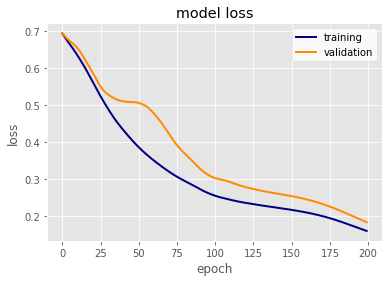

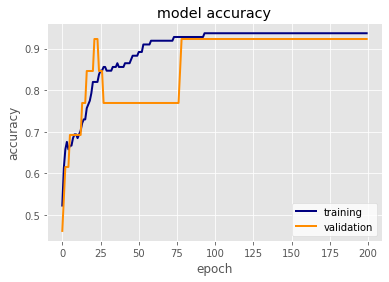

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       216
         1.0       1.00      0.83      0.91       216

    accuracy                           0.92       432
   macro avg       0.93      0.92      0.92       432
weighted avg       0.93      0.92      0.92       432



In [13]:
from yase.ml.neural_network.activations import sigmoid, tanh
from yase.ml.neural_network.layers import FullyConnected
from yase.ml.neural_network.losses import binary_cross_entropy
from yase.ml.neural_network import NeuralNetworkClassifier
from yase.ml.utils import plot_model_accuracy, plot_model_loss

from yase.optimization.unconstrained.stochastic import Adam

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(1)

X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
X_test = OneHotEncoder(sparse=False).fit_transform(X_test)

net = NeuralNetworkClassifier((FullyConnected(17, 4, tanh),
                               FullyConnected(4, 4, tanh),
                               FullyConnected(4, 1, sigmoid)),
                              loss=binary_cross_entropy, optimizer=Adam, 
                              learning_rate=0.01, max_iter=200, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #2

epoch	f(x)	
   0	7.4071e-01	val_loss: 7.2827e-01	acc: 0.4013	val_acc: 0.3529
  10	6.5779e-01	val_loss: 6.4695e-01	acc: 0.6184	val_acc: 0.6471
  20	5.9992e-01	val_loss: 6.0492e-01	acc: 0.6513	val_acc: 0.7059
  30	4.3967e-01	val_loss: 4.8623e-01	acc: 0.5921	val_acc: 0.5294
  40	3.5663e-01	val_loss: 4.2224e-01	acc: 0.6382	val_acc: 0.5882
  50	3.0219e-01	val_loss: 3.3323e-01	acc: 0.8026	val_acc: 0.8824
  60	2.8348e-01	val_loss: 3.2143e-01	acc: 0.8355	val_acc: 0.8235
  70	2.7852e-01	val_loss: 3.1875e-01	acc: 0.8355	val_acc: 0.8235
  80	2.7648e-01	val_loss: 3.1687e-01	acc: 0.8355	val_acc: 0.8235
  90	2.7556e-01	val_loss: 3.1661e-01	acc: 0.8355	val_acc: 0.8235
 100	2.7500e-01	val_loss: 3.1585e-01	acc: 0.8355	val_acc: 0.8235
 110	2.7460e-01	val_loss: 3.1566e-01	acc: 0.8355	val_acc: 0.8235
 120	2.7429e-01	val_loss: 3.1521e-01	acc: 0.8355	val_acc: 0.8235
 130	2.7403e-01	val_loss: 3.1501e-01	acc: 0.8355	val_acc: 0.8235
 140	2.7382e-01	val_loss: 3.1475e-01	acc: 0.8355	val_acc: 0.8235
 150	2.7364e-

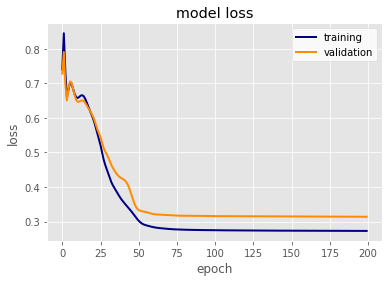

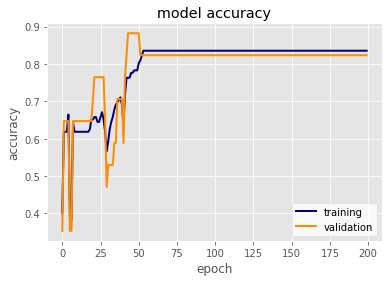

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       290
         1.0       1.00      0.55      0.71       142

    accuracy                           0.85       432
   macro avg       0.91      0.77      0.80       432
weighted avg       0.88      0.85      0.84       432



In [14]:
from yase.ml.neural_network.activations import sigmoid, softmax
from yase.ml.neural_network.layers import FullyConnected
from yase.ml.neural_network.losses import sparse_categorical_cross_entropy
from yase.ml.neural_network import NeuralNetworkClassifier
from yase.ml.utils import plot_model_accuracy, plot_model_loss

from yase.optimization.unconstrained.stochastic import Adam

from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(2)

X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
X_test = OneHotEncoder(sparse=False).fit_transform(X_test)

net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 2, softmax)),
                              loss=sparse_categorical_cross_entropy, optimizer=Adam, 
                              learning_rate=0.2, max_iter=200, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #3

epoch	f(x)	
   0	4.1779e-01	val_loss: 3.7913e-01	acc: 0.4862	val_acc: 0.7692
  10	1.8377e-01	val_loss: 1.4203e-01	acc: 0.8624	val_acc: 0.9231
  20	7.0320e-02	val_loss: 1.2768e-02	acc: 0.9541	val_acc: 1.0000
  30	5.5230e-02	val_loss: 1.2573e-02	acc: 0.9725	val_acc: 1.0000
  40	5.0872e-02	val_loss: 1.2020e-02	acc: 0.9725	val_acc: 1.0000
  50	4.9431e-02	val_loss: 1.0016e-02	acc: 0.9725	val_acc: 1.0000
  60	4.8695e-02	val_loss: 1.1205e-02	acc: 0.9725	val_acc: 1.0000
  70	4.8229e-02	val_loss: 1.0470e-02	acc: 0.9633	val_acc: 1.0000
  80	4.7937e-02	val_loss: 1.1886e-02	acc: 0.9725	val_acc: 1.0000
  90	4.7737e-02	val_loss: 1.1713e-02	acc: 0.9633	val_acc: 1.0000
 100	4.7594e-02	val_loss: 1.2102e-02	acc: 0.9633	val_acc: 1.0000
 110	4.7479e-02	val_loss: 1.2647e-02	acc: 0.9633	val_acc: 1.0000
 120	4.7385e-02	val_loss: 1.3118e-02	acc: 0.9633	val_acc: 1.0000
 130	4.7306e-02	val_loss: 1.3649e-02	acc: 0.9633	val_acc: 1.0000
 140	4.7237e-02	val_loss: 1.4154e-02	acc: 0.9633	val_acc: 1.0000
 150	4.7173e-

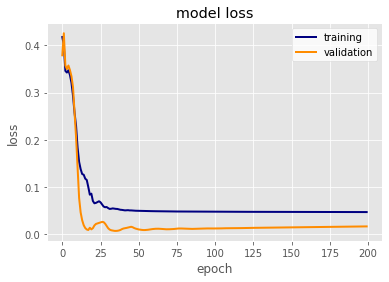

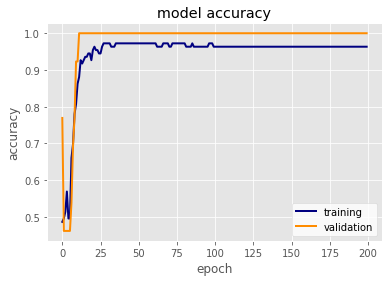

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       204
         1.0       0.99      0.88      0.93       228

    accuracy                           0.93       432
   macro avg       0.93      0.93      0.93       432
weighted avg       0.94      0.93      0.93       432



In [21]:
from yase.ml.neural_network.activations import tanh, softmax
from yase.ml.neural_network.layers import FullyConnected
from yase.ml.neural_network.losses import categorical_cross_entropy
from yase.ml.neural_network import NeuralNetworkClassifier
from yase.ml.neural_network.regularizers import L2
from yase.ml.utils import plot_model_accuracy, plot_model_loss

from yase.optimization.unconstrained.stochastic import Adam

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = load_monk(3)

X_train = OneHotEncoder(sparse=False).fit_transform(X_train)
X_test = OneHotEncoder(sparse=False).fit_transform(X_test)

y_train = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))

net = NeuralNetworkClassifier((FullyConnected(17, 4, tanh, coef_reg=L2(1e-5), inter_reg=L2(1e-5)),
                               FullyConnected(4, 4, tanh, coef_reg=L2(1e-5), inter_reg=L2(1e-5)),
                               FullyConnected(4, 2, softmax, coef_reg=L2(1e-5), inter_reg=L2(1e-5))),
                              loss=categorical_cross_entropy, optimizer=Adam,
                              learning_rate=0.2, max_iter=200, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

## ML-CUP19

In [22]:
import numpy as np

def load_ml_cup():
    ml_cup = np.delete(np.genfromtxt(module_path + '/yase/ml/data/ML-CUP19/ML-CUP19-TR.csv', delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_ml_cup_blind():
    return np.delete(np.genfromtxt(module_path + '/yase/ml/data/ML-CUP19/ML-CUP19-TS.csv', delimiter=','), obj=0, axis=1)

In [23]:
def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=y_true.ndim - 1))  # for multi-output compatibility

In [3]:
from yase.ml.utils import plot_validation_curve, plot_learning_curve
from yase.ml.svm import SVR

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

X, y = load_ml_cup()

gamma_range = [1e-8, 1e-6, 1e-4, 1e-2, 1]
C_range = [0.1, 1, 10, 100, 1000, 1500, 2000, 2500]
epsilon_range = [0.0001, 0.001, 0.1, 0.2, 0.3]

tuned_parameters = {'estimator__kernel': ['rbf', 'laplacian'],
                    'estimator__epsilon': epsilon_range,
                    'estimator__C': C_range,
                    'estimator__gamma': gamma_range}

grid = GridSearchCV(MultiOutputRegressor(SVR()),
                    param_grid=tuned_parameters,
                    scoring=make_scorer(mean_euclidean_error, greater_is_better=False),
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full dataset
                    verbose=True)
grid.fit(X, y)
print(f'best parameters: {grid.best_params_}')
print(f'best score: {-grid.best_score_}')

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  8.0min finished


best parameters: {'estimator__C': 100, 'estimator__epsilon': 0.001, 'estimator__gamma': 1e-08, 'estimator__kernel': <function laplacian_kernel at 0x7f8b7fa5d3a0>}
best score: 0.7489511761793546


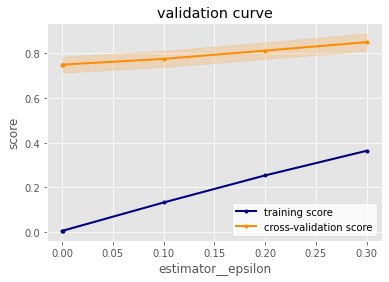

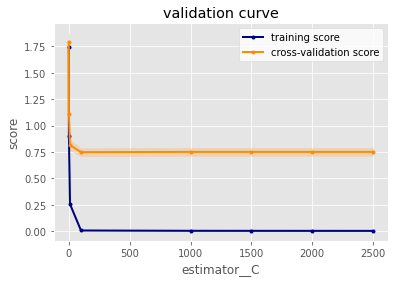

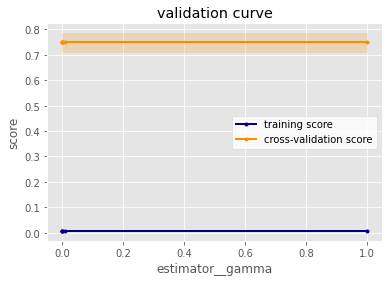

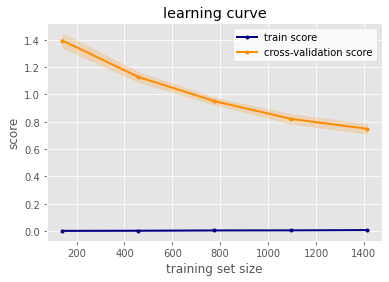

In [2]:
scorer = make_scorer(mean_euclidean_error)

# plot validation curve to visualize the performance metric over a
# range of values for some hyperparameters (C, gamma, epsilon, etc.)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__epsilon', epsilon_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__C', C_range, scorer)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__gamma', gamma_range, scorer)

# plot learning curve to visualize the effect of the
# number of observations on the performance metric
plot_learning_curve(grid.best_estimator_, X, y, scorer)

In [ ]:
# save predictions on the blind test set
np.savetxt(module_path + '/yase/ml/data/ML-CUP19/dmeoli_ML-CUP19-TS.csv', grid.predict(load_ml_cup_blind()), delimiter=',')